
Sentiment Analysis in Python



    VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
    Roberta Pretrained Model from 🤗
    Huggingface Pipeline



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk




In [2]:
# read in data
df = pd.read_csv('DatasetIntel.csv')

In [3]:


# Assuming 'data.csv' is your dataset file
df = pd.read_csv('DatasetIntel.csv')

# Add a new column 'ID' with unique identifiers
df['ID'] = range(1, len(df) + 1)

# Now your dataframe 'df' has an 'ID' column with unique identifiers for each row
print(df)



                 category  rating  label  \
0      Home_and_Kitchen_5       5      0   
1      Home_and_Kitchen_5       5      0   
2      Home_and_Kitchen_5       5      0   
3      Home_and_Kitchen_5       1      0   
4      Home_and_Kitchen_5       5      0   
...                   ...     ...    ...   
5870  Sp1ts_and_Outdo1s_5       5      0   
5871  Sp1ts_and_Outdo1s_5       4      0   
5872  Sp1ts_and_Outdo1s_5       5      1   
5873  Sp1ts_and_Outdo1s_5       5      1   
5874  Sp1ts_and_Outdo1s_5       5      1   

                                                  text_    ID  
0     Love this!  Well made, sturdy, and very comf1t...     1  
1     love it, a great upgrade from the 1iginal.  I'...     2  
2     This pillow saved my back. I love the look and...     3  
3     Missing inf1mation on how to use it, but it is...     4  
4     Very nice set. Good quality. We have had the s...     5  
...                                                 ...   ...  
5870  there is a techni

In [4]:
df.head()

,category,rating,label,text_,ID
0,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t...",1
1,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'...",2
2,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...,3
3,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is...",4
4,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...,5


In [5]:
df['text_'].values[0]

'Love this!  Well made, sturdy, and very comf1table.  I love it!Very pretty'

In [6]:
# it s provide the information about the number of rows and colums in an dataset
print(df.shape)

(5875, 5)


Quick EDA

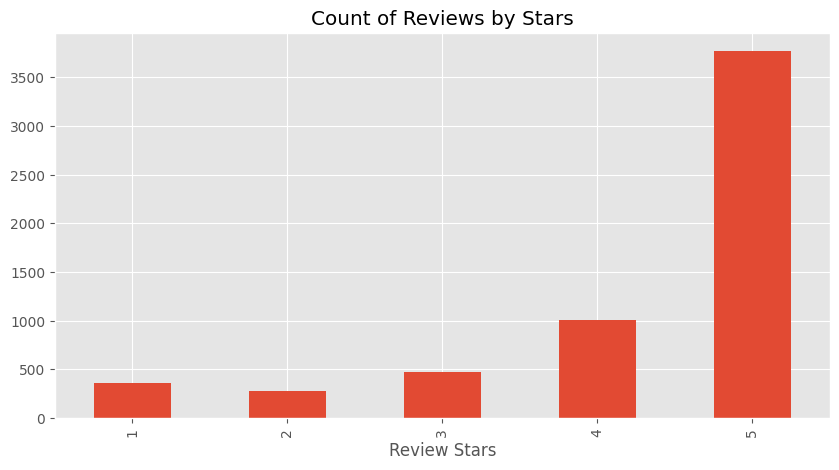

In [7]:
# here the value_count fn give information about the number of times each rating occurs
ax = df['rating'].value_counts().sort_index()\
    .plot(kind='bar',
           title='Count of Reviews by Stars',
             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

Basic NLTK

In [8]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\CYRUS
[nltk_data]     DADY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
example = df['text_'][50]
print(example)

Perfect. They do exactly what I need them to do. I will keep them f1 a long time


In [10]:
example = "This is an example sentence."
tokens = nltk.word_tokenize(example)
print(tokens[:10])


['This', 'is', 'an', 'example', 'sentence', '.']


In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CYRUS DADY\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
# this gives the tokens along with their speech
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('example', 'NN'),
 ('sentence', 'NN'),
 ('.', '.')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker/english_ace_multiclass.pickle[0m

  Searched in:
    - 'C:\\Users\\CYRUS DADY/nltk_data'
    - 'c:\\Program Files\\Python312\\nltk_data'
    - 'c:\\Program Files\\Python312\\share\\nltk_data'
    - 'c:\\Program Files\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\CYRUS DADY\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************



Step 1. VADER Seniment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

    This uses a "bag of words" approach:
        Stop words are removed
        each word is scored and combined to a total score.



In [14]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\CYRUS
[nltk_data]     DADY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia =  SentimentIntensityAnalyzer()

In [16]:
# COMPOUND is abbravtion of negative,netural,postive...which represent from how -ve to +ve
sia.polarity_scores('I am so HAPPY')

{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.6933}

In [17]:
sia.polarity_scores('it is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [18]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}

In [19]:
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to C:\Users\CYRUS
[nltk_data]     DADY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text_']
    myid = row['ID']  # Make sure 'ID' matches the actual column name
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/5875 [00:00<?, ?it/s]

In [21]:
df

,category,rating,label,text_,ID
0,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t...",1
1,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'...",2
2,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...,3
3,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is...",4
4,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...,5
...,...,...,...,...,...
5870,Sp1ts_and_Outdo1s_5,5,0,there is a technique to use a small spoon to g...,5871
5871,Sp1ts_and_Outdo1s_5,4,0,Glad I got this. Not a bad quality product. ...,5872
5872,Sp1ts_and_Outdo1s_5,5,1,These small ice packs are used in my children'...,5873
5873,Sp1ts_and_Outdo1s_5,5,1,I go through a lot of riding gloves and this p...,5874


In [22]:
#  T is used to rotate horizontal
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')


In [23]:
# Now we have sentiment score and meta data
vaders.head()

,ID,neg,neu,pos,compound,category,rating,label,text_
0,1,0.000,0.325,0.675,0.9389,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t..."
1,2,0.000,0.591,0.409,0.8519,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'..."
2,3,0.000,0.611,0.389,0.7906,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...
3,4,0.078,0.633,0.289,0.7463,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is..."
4,5,0.000,0.719,0.281,0.7397,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...


Plot VADER result

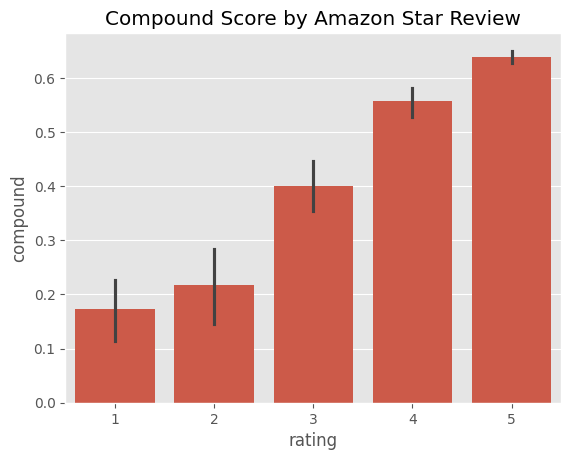

In [24]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

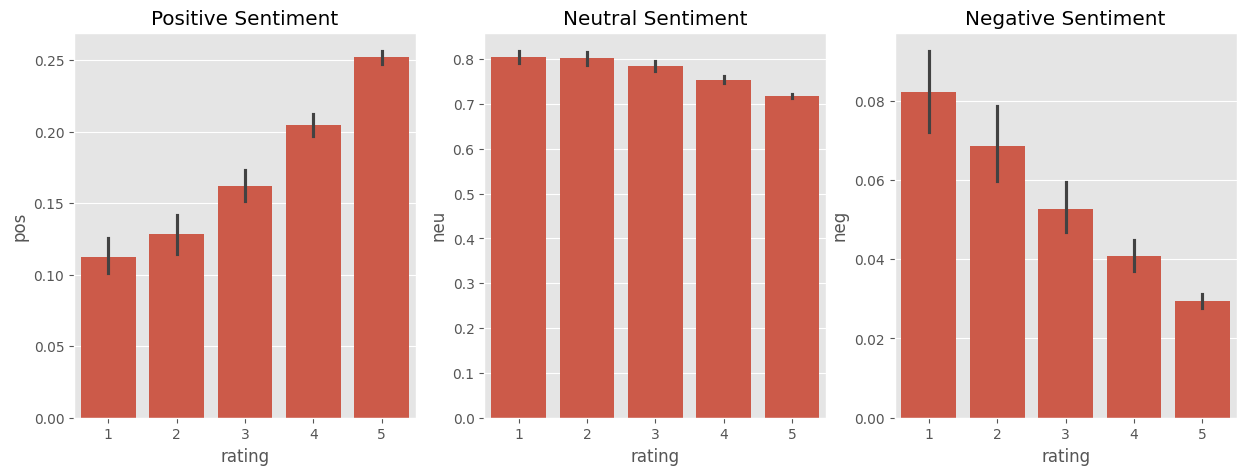

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')
plt.show()


In [26]:
# PICKLE
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Save the instance using pickle
with open('vader_sentiment_analyzer.pkl', 'wb') as f:
    pickle.dump(sia, f)



Step 3. Roberta Pretrained Model¶

    Use a model trained of a large corpus of data.
    Transformer model accounts for the words but also the context related to other words.



In [ ]:
pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 163.8 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.2 MB 163.8 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.2 MB 163.4 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.2 MB 204.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.2 MB 254.2 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.2 MB 284.4 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.2 MB 288.1 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.2 MB 360.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.2/1.2 MB 430.1 kB/s eta 0:00:03
   --------- 

In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\CYRUS DADY\AppData\Roaming\Python\Python312\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [ ]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.3.0-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.3.0-cp312-cp312-win_amd64.whl (159.7 MB)
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB 119.1 kB/s eta 0:31:59
   ------------

In [ ]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [ ]:
# Vader results on example
print(example)
sia.polarity_scores(example)

Perfect. They do exactly what I need them to do. I will keep them f1 a long time


{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}

In [ ]:
# run for Robert Model (this provide the encoded text)
encoded_text = tokenizer(example, return_tensors='pt')
output =  model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.006310872, 'roberta_neu': 0.08047889, 'roberta_pos': 0.9132103}


In [ ]:
def polarity_scores_roberta(examples):
    encoded_text = tokenizer(example, return_tensors='pt')
    output =  model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
    

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
                text = row['text_']
                myid = row['ID']  # Make sure 'ID' matches the actual column name
                vader_result = sia.polarity_scores(text)
                vader_result_rename = {}
                for key, value in vader_result.items():
                        vader_result_rename[f"vader_{key}"] = value
                roberta_result = polarity_scores_roberta(text)
                both = {**vader_result_rename, **roberta_result}
                res[myid] = both
        except RuntimeError:
                print(f'Broke for id {myid}')
        


  0%|          | 0/5875 [00:00<?, ?it/s]

In [ ]:
#  T is used to rotate horizontal
results_df = pd.DataFrame(res).T
results_df  = results_df.reset_index().rename(columns={'index': 'ID'})
results_df  = results_df.merge(df, how='left')


In [ ]:
results_df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,category,rating,label,text_
0,1,0.000,0.325,0.675,0.9389,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t..."
1,2,0.000,0.591,0.409,0.8519,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'..."
2,3,0.000,0.611,0.389,0.7906,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...
3,4,0.078,0.633,0.289,0.7463,0.006311,0.080479,0.91321,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is..."
4,5,0.000,0.719,0.281,0.7397,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...


Compare Scores between models

In [ ]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'category', 'rating',
       'label', 'text_'],
      dtype='object')

In [ ]:
roberta_result

{'roberta_neg': 0.006310872,
 'roberta_neu': 0.08047889,
 'roberta_pos': 0.9132103}

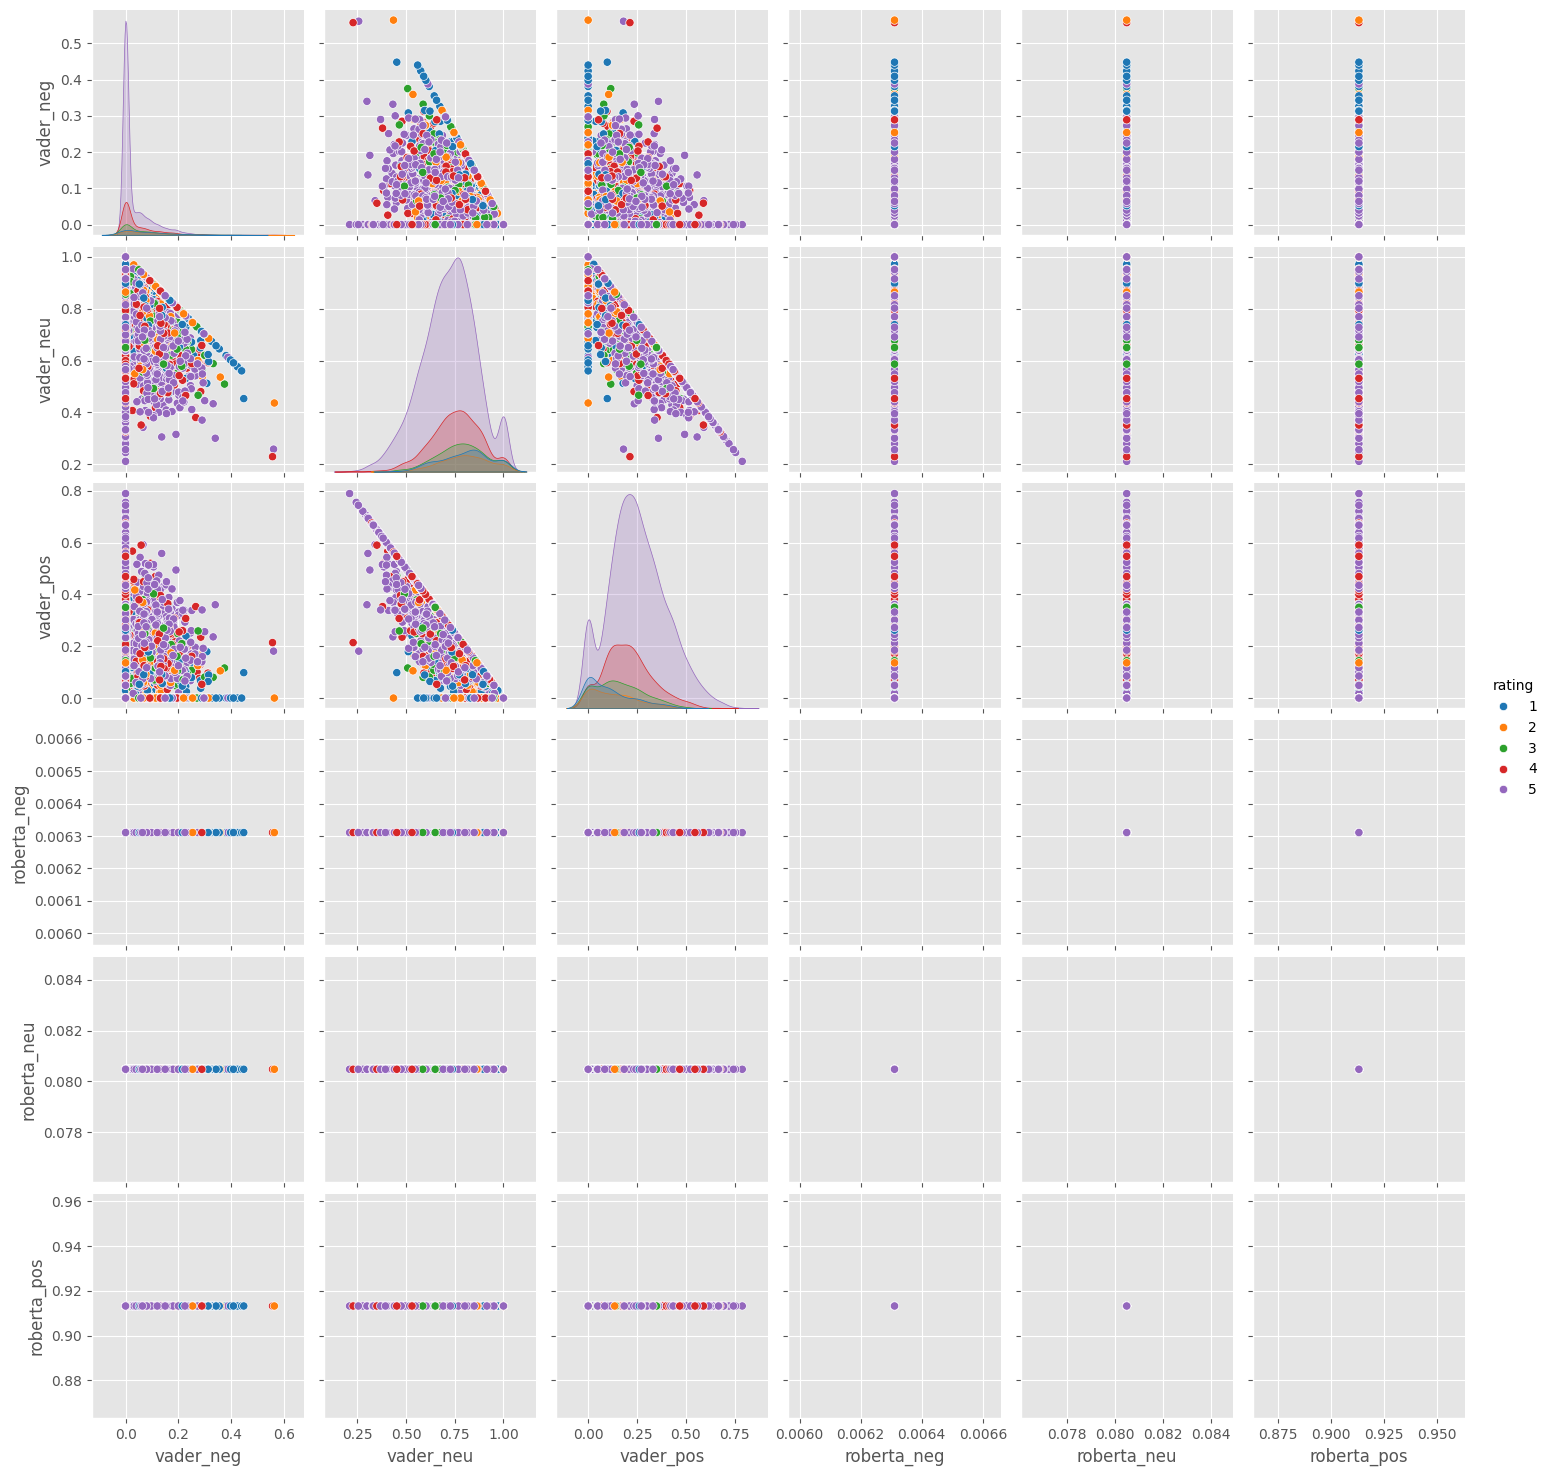

In [ ]:
sns.pairplot(data=results_df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='rating',
             palette='tab10')
plt.show()

In [ ]:
results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,category,rating,label,text_
0,1,0.000,0.325,0.675,0.9389,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,"Love this! Well made, sturdy, and very comf1t..."
1,2,0.000,0.591,0.409,0.8519,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,"love it, a great upgrade from the 1iginal. I'..."
2,3,0.000,0.611,0.389,0.7906,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,This pillow saved my back. I love the look and...
3,4,0.078,0.633,0.289,0.7463,0.006311,0.080479,0.91321,Home_and_Kitchen_5,1,0,"Missing inf1mation on how to use it, but it is..."
4,5,0.000,0.719,0.281,0.7397,0.006311,0.080479,0.91321,Home_and_Kitchen_5,5,0,Very nice set. Good quality. We have had the s...
...,...,...,...,...,...,...,...,...,...,...,...,...
5870,5871,0.000,1.000,0.000,0.0000,0.006311,0.080479,0.91321,Sp1ts_and_Outdo1s_5,5,0,there is a technique to use a small spoon to g...
5871,5872,0.000,0.531,0.469,0.9209,0.006311,0.080479,0.91321,Sp1ts_and_Outdo1s_5,4,0,Glad I got this. Not a bad quality product. ...
5872,5873,0.150,0.850,0.000,-0.6688,0.006311,0.080479,0.91321,Sp1ts_and_Outdo1s_5,5,1,These small ice packs are used in my children'...
5873,5874,0.000,0.915,0.085,0.4522,0.006311,0.080479,0.91321,Sp1ts_and_Outdo1s_5,5,1,I go through a lot of riding gloves and this p...


In [ ]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['text_'].values[0]



'Missing inf1mation on how to use it, but it is a great product f1 the price!  I'

In [ ]:


results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['text_'].values[0]



'Expecting to be able to use it at least once a week, but my son loves it!Great product. Great price! I am very happy with the purchase.This is a great fan. It is quiet and does not have a fan noise. This fan is excellent. The reviews said it was a great fan, but it is not. It is a cheap fan that has a'

In [ ]:


results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['text_'].values[0]



'Love this!  Well made, sturdy, and very comf1table.  I love it!Very pretty'

In [ ]:


results_df.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['text_'].values[0]



'Nice fl1al. no dead heading and no watering.'

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\celia\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [ ]:


sent_pipeline('Make sure to like and subscribe!')



[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [ ]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [ ]:
import torch

torch.save(model, "model_weights.pth") 

In [ ]:
torch.save(model, "model_weights.pth") 

In [ ]:
import torch
from transformers import RobertaModel, RobertaTokenizer

# Load the saved model
model = torch.load("model_weights.pth")

# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\celia\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
import pickle

# Save the tokenizer using pickle
with open('roberta_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [ ]:
import pickle

# Load the saved tokenizer
with open('roberta_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load Vader Sentiment Intensity Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Load RoBERTa model and tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base')

# Function to combine Vader and RoBERTa sentiment analysis
def combined_sentiment(text):
    # Vader sentiment analysis
    vader_scores = vader_analyzer.polarity_scores(text)
    vader_compound_score = vader_scores['compound']

    # RoBERTa sentiment analysis
    inputs = roberta_tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    outputs = roberta_model(**inputs)
    logits = outputs.logits
    softmax_scores = torch.softmax(logits, dim=1).tolist()[0]
    roberta_positive_score = softmax_scores[1]

    # Combine scores
    combined_score = (vader_compound_score + roberta_positive_score) / 2

    return combined_score


Compare and Combine